In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Calculate for each sentence the average score assigned to the sentence. 

In [ ]:
assignments_1 = pd.read_csv('assignments_from_pool_37687290__12-02-2023.tsv', sep = '\t')
assignments_2 = pd.read_csv('assignments_from_pool_37939772__27-02-2023.tsv', sep = '\t')
assignments_3 = pd.read_csv('assignments_from_pool_37806285__16-03-2023.tsv', sep = '\t')

print(assignments_1.shape)
print(assignments_2.shape)
print(assignments_3.shape)

(910, 13)
(11540, 13)
(11600, 13)


In [ ]:
assignments = pd.concat([assignments_1, assignments_2, assignments_2], axis = 0)
assignments.shape

(23990, 13)

In [ ]:
assignments.columns

Index(['INPUT:text', 'INPUT:text1', 'INPUT:text2', 'OUTPUT:category',
       'GOLDEN:category', 'HINT:text', 'HINT:default_language',
       'ASSIGNMENT:link', 'ASSIGNMENT:task_id', 'ASSIGNMENT:assignment_id',
       'ASSIGNMENT:worker_id', 'ASSIGNMENT:status', 'ASSIGNMENT:started'],
      dtype='object')

In [ ]:
assignments.dropna(inplace = True, axis=1)
assignments.head(2)

,INPUT:text,OUTPUT:category,ASSIGNMENT:link,ASSIGNMENT:task_id,ASSIGNMENT:assignment_id,ASSIGNMENT:worker_id,ASSIGNMENT:status,ASSIGNMENT:started
0,"Мог иметься в виду и слесарь , и столяр .",[1],https://toloka.yandex.ru/task/37687290/00023f0...,00023f0ffa--63e7ad0503b5dd74ad8e590a,00023f0ffa--63e7b6991d35f828b7ff82c4,a6c40188c393d304cfb1f04c71627daa,APPROVED,2023-02-11T15:39:05.095
1,Она уложила сено в ванночку и залила его кипят...,[4],https://toloka.yandex.ru/task/37687290/00023f0...,00023f0ffa--63e7ad1403b5dd74ad8e5b91,00023f0ffa--63e7b69ebf19e327ec3ba785,ae71dad8da578d7971bc8eaec42fbb56,APPROVED,2023-02-11T15:39:10.215


In [ ]:
#assignments['GOLDEN:category'].isnull().sum()

12450

In [ ]:
assignments.columns = 'text cat link task_id assignment_id worker_id status started'.split()
assignments['category'] = assignments.cat.apply(lambda x: int(x[1]))
assignments = assignments.drop(assignments.columns[1], axis=1)
assignments.head(1)

,text,link,task_id,assignment_id,worker_id,status,started,category
0,"Мог иметься в виду и слесарь , и столяр .",https://toloka.yandex.ru/task/37687290/00023f0...,00023f0ffa--63e7ad0503b5dd74ad8e590a,00023f0ffa--63e7b6991d35f828b7ff82c4,a6c40188c393d304cfb1f04c71627daa,APPROVED,2023-02-11T15:39:05.095,1


In [ ]:
assignments.shape

(23990, 8)

### Test

In [ ]:
text_grouped = assignments.groupby('text')


In [ ]:
text_grouped.head()

,text,link,task_id,assignment_id,worker_id,status,started,category
0,"Мог иметься в виду и слесарь , и столяр .",https://toloka.yandex.ru/task/37687290/00023f0...,00023f0ffa--63e7ad0503b5dd74ad8e590a,00023f0ffa--63e7b6991d35f828b7ff82c4,a6c40188c393d304cfb1f04c71627daa,APPROVED,2023-02-11T15:39:05.095,1
1,Она уложила сено в ванночку и залила его кипят...,https://toloka.yandex.ru/task/37687290/00023f0...,00023f0ffa--63e7ad1403b5dd74ad8e5b91,00023f0ffa--63e7b69ebf19e327ec3ba785,ae71dad8da578d7971bc8eaec42fbb56,APPROVED,2023-02-11T15:39:10.215,4
2,Она уложила сено в ванночку и залила его кипят...,https://toloka.yandex.ru/task/37687290/00023f0...,00023f0ffa--63e7ad1403b5dd74ad8e5b91,00023f0ffa--63e7b6a331137e5dec1c96cf,cb11b48e08973ea783e7edbe9f5bacc3,APPROVED,2023-02-11T15:39:15.628,3
3,"Быть наедине и хочется , и _ _ страшно .",https://toloka.yandex.ru/task/37687290/00023f0...,00023f0ffa--63e7ad1103b5dd74ad8e5ade,00023f0ffa--63e7b6a531137e5dec1c971e,420982db70b405e2bcdc1dc117ee6dfc,APPROVED,2023-02-11T15:39:17.338,2
4,"Мог иметься в виду и слесарь , и столяр .",https://toloka.yandex.ru/task/37687290/00023f0...,00023f0ffa--63e7ad0503b5dd74ad8e590a,00023f0ffa--63e7b6a6cf02855709a0f9b9,c828f82e8b0a9fb112dec057b999bc97,APPROVED,2023-02-11T15:39:18.241,3
...,...,...,...,...,...,...,...,...
11501,Такое представление на длительное время заторм...,https://toloka.yandex.ru/task/37939772/000242e...,000242ea3c--63fc6c692666752d7949f7bf,000242ea3c--63fc81df841496172e572e37,6d3a848a22863f0ff96c99b01e9d12e7,APPROVED,2023-02-27T10:11:43.425,4
11502,"В нынешней ситуации и авторы концепции , и нез...",https://toloka.yandex.ru/task/37939772/000242e...,000242ea3c--63fc6c6b2666752d7949f803,000242ea3c--63fc81e0237ce11eb64f9d3d,4dda58ee3dab0bd1e588e5dbfc51fc2f,APPROVED,2023-02-27T10:11:44.147,4
11505,"В нынешней ситуации и авторы концепции , и нез...",https://toloka.yandex.ru/task/37939772/000242e...,000242ea3c--63fc6c6b2666752d7949f803,000242ea3c--63fc81e15628fb3522543b7d,a6fc1726c5dbf83c2de3cb3f6f89fd37,APPROVED,2023-02-27T10:11:45.194,6
11507,Такое представление на длительное время заторм...,https://toloka.yandex.ru/task/37939772/000242e...,000242ea3c--63fc6c692666752d7949f7bf,000242ea3c--63fc81e18b2e143ff715c34e,1ccfdf8e8b6d9db125d4f27afa186753,APPROVED,2023-02-27T10:11:45.135,5


In [ ]:
assignments_grouped = assignments.groupby('text')['category'].mean().reset_index()


In [ ]:
assignments_grouped.head()

,text,category
0,Автомобили появятся в салонах официальных диле...,2.40
1,Администрация города обратилась в прокуратуру ...,2.40
2,Аккуратно вскрытый конверт и письмо лежали на ...,2.30
3,Английские войска вторгаются в Ирак и свергают...,2.65
4,"Аргументы правозащитников о том , что и за год...",5.10


In [ ]:
assignments_grouped.shape

(645, 2)

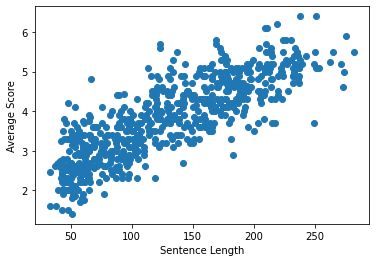

In [ ]:

assignments_grouped['length'] = assignments_grouped['text'].apply(len)
plt.scatter(assignments_grouped['length'], assignments_grouped['category'])
plt.xlabel('Sentence Length')
plt.ylabel('Average Score')
plt.show()


## plot distribution of avgerage scores inside each bin.

In [1]:

'''
# Get the unique values in the "score" column, and sort them in ascending order
unique_scores = sorted(assignments_grouped["category"].unique())
# Generate a color palette with the same number of colors as unique scores
palette = sns.color_palette("coolwarm", n_colors=len(unique_scores))

# Map each score to a color in the palette
score_to_color = {score: color for score, color in zip(unique_scores, palette)}

assignments_grouped["color"] = assignments_grouped["category"].map(score_to_color)

plt.figure(figsize=(14, 10))

# Plot the scores grouped by sentence length, using the temperature scale for the color
sns.scatterplot(data=assignments_grouped, x="length", y="category", hue="color", legend="brief")
plt.xlabel("Sentence length")
plt.ylabel("Average score")
plt.show()
'''

'\n# Get the unique values in the "score" column, and sort them in ascending order\nunique_scores = sorted(assignments_grouped["category"].unique())\n# Generate a color palette with the same number of colors as unique scores\npalette = sns.color_palette("coolwarm", n_colors=len(unique_scores))\n\n# Map each score to a color in the palette\nscore_to_color = {score: color for score, color in zip(unique_scores, palette)}\n\nassignments_grouped["color"] = assignments_grouped["category"].map(score_to_color)\n\nplt.figure(figsize=(14, 10))\n\n# Plot the scores grouped by sentence length, using the temperature scale for the color\nsns.scatterplot(data=assignments_grouped, x="length", y="category", hue="color", legend="brief")\nplt.xlabel("Sentence length")\nplt.ylabel("Average score")\nplt.show()\n'

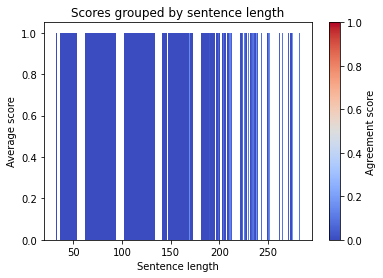

In [ ]:

assignments_grouped['average_score'] = assignments_grouped.groupby('text')['category'].transform('mean')
assignments_grouped['length'] = assignments_grouped['text'].apply(len)
grouped_df = assignments_grouped.groupby('length')['average_score'].mean().reset_index()
def score_to_color(score):
    # Define the color map
    cmap = plt.cm.get_cmap('coolwarm')
    # Map the score to a temperature between -1 and 1
    temperature = (score - 5) / 5
    # Get the RGB values of the color corresponding to the temperature
    r, g, b, _ = cmap(temperature)
    # Return the color as a string in hex format
    return "#{:02x}{:02x}{:02x}".format(int(r * 255), int(g * 255), int(b * 255))

fig, ax = plt.subplots()

for i, row in grouped_df.iterrows():
    length = row['length']
    score = row['average_score']
    color = score_to_color(score)
    ax.bar(length, 1, color=color)

# Add a legend for the colors
sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('coolwarm'), norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Agreement score')

ax.set_xlabel('Sentence length')
ax.set_ylabel('Average score')
ax.set_title('Scores grouped by sentence length')

plt.show()


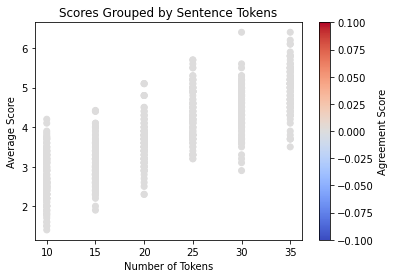

In [ ]:
# Group the dataframe by the "text" column and calculate the average score for each group
#assignments_grouped["num_tokens"] = assignments_grouped["text"].str.split().apply(len)

grouped_df = assignments_grouped.groupby('text')['category'].mean().reset_index()

# Calculate the standard deviation of the scores assigned to each sentence
agreement_scores = assignments_grouped.groupby('text')['category'].apply(np.std).reset_index(name='agreement_score')

# Merge the average scores and agreement scores dataframes
merged_df = pd.merge(grouped_df, agreement_scores, on='text')
merged_df['num_tokens'] = assignments_grouped["text"].str.split().apply(len)
# Plot the scores grouped according to sentence tokens
plt.scatter(merged_df['num_tokens'], merged_df['category'], c=merged_df['agreement_score'], cmap='coolwarm')
plt.xlabel('Number of Tokens')
plt.ylabel('Average Score')
plt.colorbar(label='Agreement Score')
plt.title('Scores Grouped by Sentence Tokens')
plt.show()

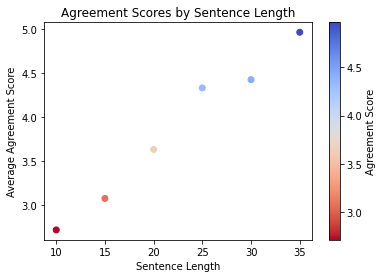

In [ ]:
# calculate the average score for each sentence
df_sentence_scores = assignments_grouped.groupby('text')['category'].mean().reset_index()

# add a new column for the length of each sentence
df_sentence_scores['length'] = df_sentence_scores['text'].apply(lambda x: len(x.split()))

# create a new dataframe that groups sentences by length and calculates the mean agreement score for each group
df_length_scores = df_sentence_scores.groupby('length')['category'].mean().reset_index()

# create a color map that maps the agreement score to a color using a color gradient
color_map = sns.color_palette("coolwarm_r", as_cmap=True)

# create a scatter plot of the sentence lengths against the average agreement score, using the color map to color the points
plt.scatter(df_length_scores['length'], df_length_scores['category'], c=df_length_scores['category'], cmap=color_map)

# add a legend to the plot to show the relationship between the colors and the agreement scores
cbar = plt.colorbar()
cbar.set_label('Agreement Score')

plt.xlabel('Sentence Length')
plt.ylabel('Average Agreement Score')
plt.title('Agreement Scores by Sentence Length')
plt.show()

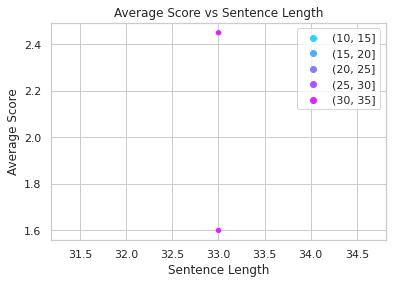

In [ ]:
# Calculate the average score for each sentence
avg_scores = assignments_grouped.groupby('text')['category'].mean()

# Group the sentences based on their lengths
sentence_lengths = avg_scores.index.str.len()
score_groups = pd.cut(sentence_lengths, bins=[10, 15, 20, 25, 30, 35])

# Plot the scores using color to represent the agreement score
sns.set(style="whitegrid")
sns.scatterplot(x=sentence_lengths, y=avg_scores, hue=score_groups, palette='cool', legend='full')
plt.xlabel('Sentence Length')
plt.ylabel('Average Score')
plt.title('Average Score vs Sentence Length')
plt.show()





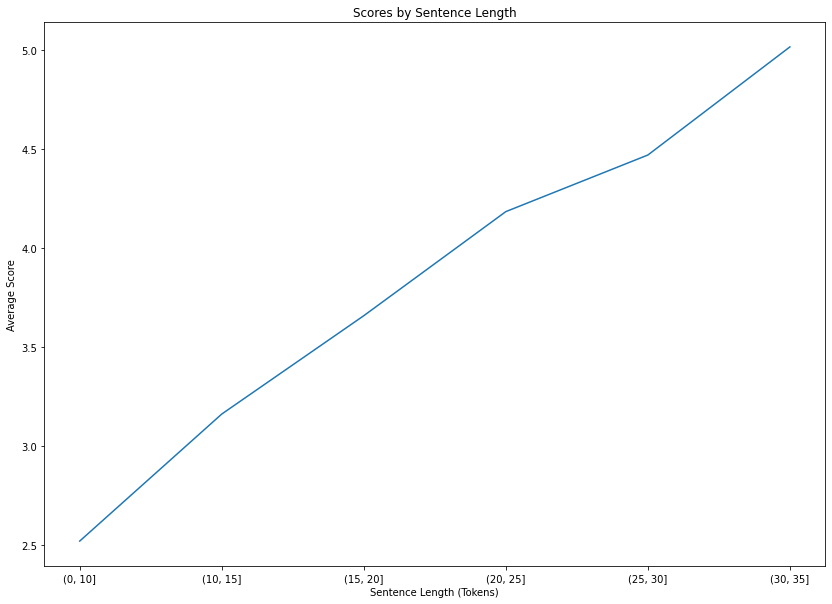

In [ ]:
import statistics

# Count the number of assessors who scored each sentence
sentence_counts = assignments.groupby('text')['worker_id'].nunique()

# Create a dictionary to store the scores for each sentence
sentence_scores = {}

# Loop through each row in the dataframe
for index, row in assignments.iterrows():
    sentence = row['text']
    score = row['category']
    worker_id = row['worker_id']
    
    # Add the score to the list of scores for this sentence
    if sentence not in sentence_scores:
        sentence_scores[sentence] = []
    sentence_scores[sentence].append(score)

# Calculate the mode of the scores for each sentence
sentence_modes = {}
for sentence, scores in sentence_scores.items():
    sentence_modes[sentence] = statistics.mode(scores)

# Count the number of sentences where all the assessors agree
all_agree = sum(1 for mode in sentence_modes.values() if mode in set(scores))

# Bin the sentences based on the number of tokens
sentence_tokens = assignments['text'].str.split().apply(len)
assignments['token_count'] = sentence_tokens
bins = pd.cut(assignments['token_count'], bins=[0, 10, 15, 20, 25, 30, 35])

# Calculate the average score for each bin
bin_scores = assignments.groupby(bins)['category'].mean()

plt.figure(figsize=(14, 10))
# Plot the scores
plt.plot(bin_scores.index.astype(str), bin_scores)
plt.xlabel('Sentence Length (Tokens)')
plt.ylabel('Average Score')
plt.title('Scores by Sentence Length')
plt.show()


<Figure size 1008x720 with 0 Axes>

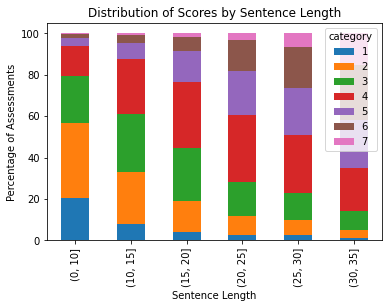

In [ ]:
# Bin the sentences based on the number of tokens
sentence_tokens = assignments['text'].str.split().apply(len)
assignments['token_count'] = sentence_tokens
bins = pd.cut(assignments['token_count'], bins=[0, 10, 15, 20, 25, 30, 35])

# Group the data by sentence length bin and score
grouped = assignments.groupby([bins, 'category'])['category'].count()

# Calculate the total number of assessments for each sentence length bin
total_counts = grouped.groupby(level=0).sum()

# Calculate the percentage of assessments that gave each score for each sentence length bin
scores_by_bin = grouped / total_counts * 100

# Reshape the data so that each row represents a sentence length bin, and each column represents a score
scores_by_bin = scores_by_bin.unstack()

plt.figure(figsize=(14, 10))

# Plot the scores
scores_by_bin.plot(kind='bar', stacked=True)
plt.xlabel('Sentence Length')
plt.ylabel('Percentage of Assessments')
plt.title('Distribution of Scores by Sentence Length')
plt.show()





<Figure size 1008x720 with 0 Axes>

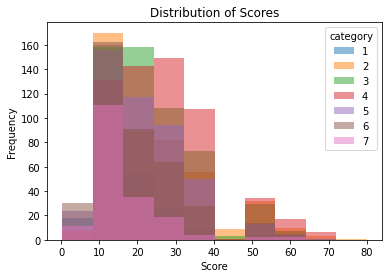

In [ ]:
# Group the data by sentence and score
grouped = assignments.groupby(['text', 'category'])['category'].count()

# Calculate the total number of assessments for each sentence
total_counts = grouped.groupby(level=0).sum()

# Calculate the percentage of assessments that gave each score for each sentence
scores_by_sentence = grouped / total_counts * 100

# Reshape the data so that each row represents a sentence, and each column represents a score
scores_by_sentence = scores_by_sentence.unstack()

plt.figure(figsize=(14, 10))

# Plot the scores
scores_by_sentence.plot(kind='hist', bins=10, alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

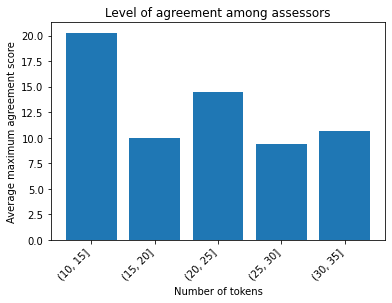

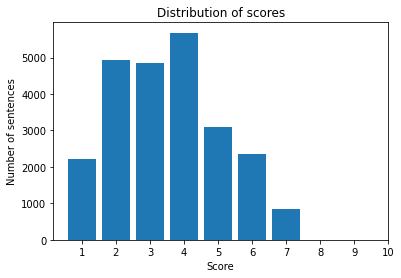

In [ ]:
# Calculate the number of assessors who agree on each score for each sentence
counts = assignments.groupby(['text', 'category'])['category'].count().reset_index(name='count')
max_counts = counts.groupby(['text'])['count'].max().reset_index(name='max_count')

# Calculate the average maximum agreement score for each bin (number of tokens)
max_counts['num_tokens'] = max_counts['text'].str.count(' ') + 1
bins = pd.cut(max_counts['num_tokens'], bins=range(10, max_counts['num_tokens'].max()+1, 5), include_lowest=False)
avg_max_counts = max_counts.groupby(bins)['max_count'].mean()

# Plot the results
plt.bar(avg_max_counts.index.astype(str), avg_max_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of tokens')
plt.ylabel('Average maximum agreement score')
plt.title('Level of agreement among assessors')
plt.show()

# Plot a histogram of the distribution of scores for the entire dataset
plt.hist(assignments['category'], bins=range(1, 11), align='left', rwidth=0.8)
plt.xticks(range(1, 11))
plt.xlabel('Score')
plt.ylabel('Number of sentences')
plt.title('Distribution of scores')
plt.show()

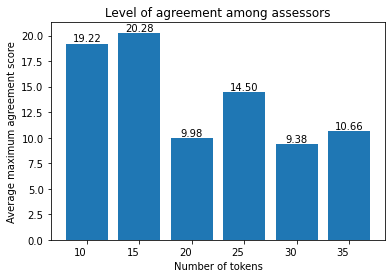

In [ ]:
# Calculate the number of assessors who agree on each score for each sentence
counts = assignments.groupby(['text', 'category'])['category'].count().reset_index(name='count')
max_counts = counts.groupby(['text'])['count'].max().reset_index(name='max_count')
max_counts['num_tokens'] = max_counts['text'].str.count(' ') + 1

# Calculate the average maximum agreement score for each number of tokens
avg_max_counts = max_counts.groupby('num_tokens')['max_count'].mean()

# Plot the results
plt.bar(avg_max_counts.index.astype(str), avg_max_counts.values)
plt.xticks(rotation=0, ha='right')
plt.xlabel('Number of tokens')
plt.ylabel('Average maximum agreement score')
plt.title('Level of agreement among assessors')

# Add text labels to each bar
for i, v in enumerate(avg_max_counts):
    plt.text(i, v, "{:.2f}".format(v), ha='center', va='bottom')


plt.show()


In [ ]:
#grouped.head()

In [ ]:
#total_counts

In [ ]:
#scores_by_sentence

## Plot the average scores within each bin.

#### histogram

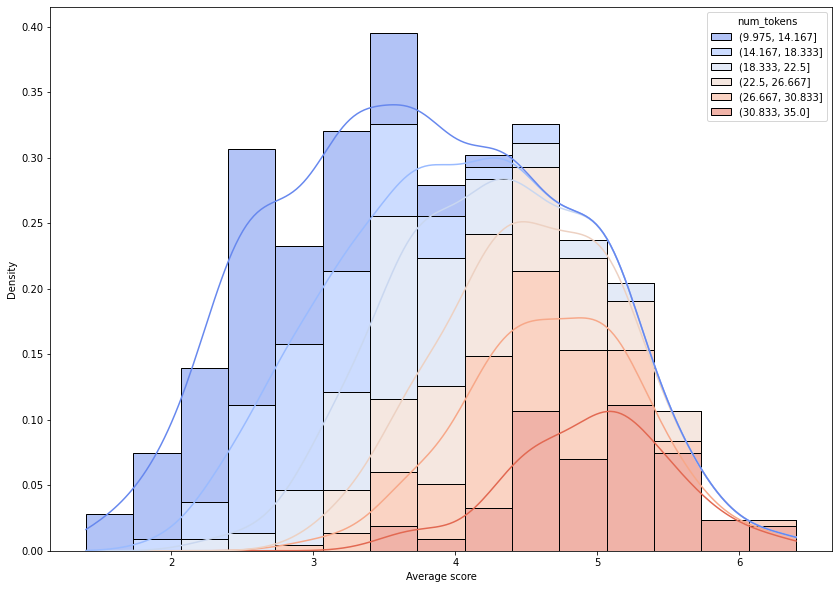

In [ ]:

# Bin the sentence lengths into equal-sized bins
assignments_grouped["num_tokens"] = assignments_grouped["text"].str.split().apply(len)
bins = pd.cut(assignments_grouped["num_tokens"], bins=6)

plt.figure(figsize=(14, 10))

# Plot a histogram of the average scores within each bin
sns.histplot(data=assignments_grouped, x="category", hue=bins, multiple="stack", kde=True, stat="density", palette="coolwarm")
plt.xlabel("Average score")
plt.ylabel("Density")
plt.show()

#### boxplot

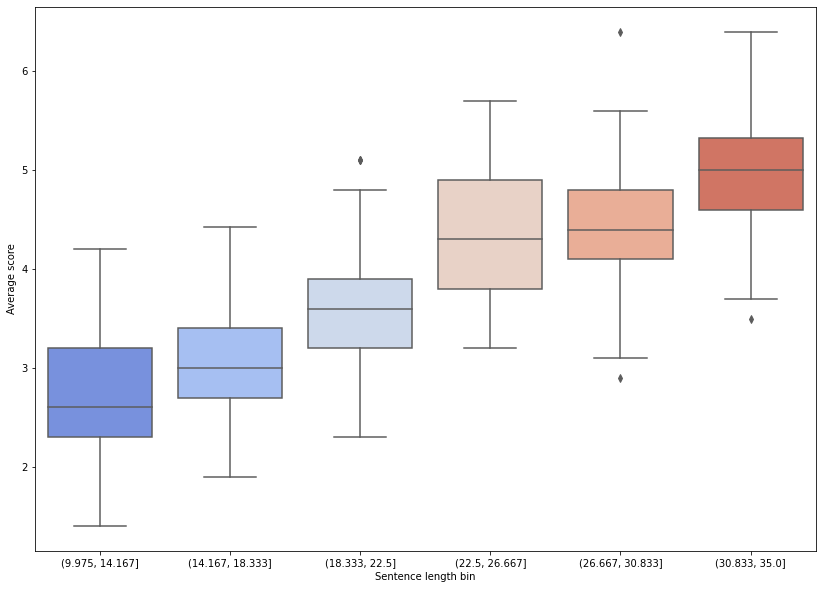

In [ ]:


plt.figure(figsize=(14, 10))
sns.boxplot(data=assignments_grouped, x=bins, y="category", palette="coolwarm")
plt.xlabel("Sentence length bin")
plt.ylabel("Average score")
plt.show()


In [ ]:
assignments_grouped["num_tokens"].unique()

array([10, 15, 35, 30, 20, 25])

## plot a linear regression

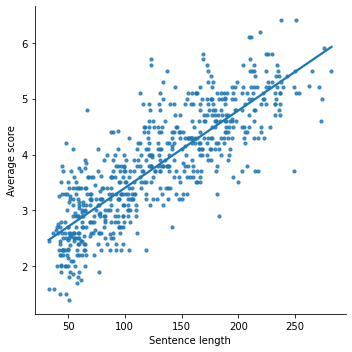

In [ ]:
sns.lmplot(data=assignments_grouped, x="length", y="category", ci=None, scatter_kws={"s": 10})
plt.xlabel("Sentence length")
plt.ylabel("Average score")
plt.show()